# Анализ результатов A/B-тестирования

## Задача:

**Проанализируйте результаты эксперимента и напишите свои рекомендации менеджеру.**

Эксперимент проводился с целью понять, как изменение в игре (размещение ворот на уровне 30 или 40) влияет на поведение пользователей. Основные метрики, которые мы анализируем:

- `sum_gamerounds` - суммарное количество раундов, сыгранных пользователем за первую неделю после установки.
- `retention_1` - доля пользователей, вернувшихся в игру через 1 день после установки.
- `retention_7` - доля пользователей, вернувшихся через 7 дней после установки.

Данные были собраны и представлены в следующей структуре:

| userid          | version | sum_gamerounds | retention_1 | retention_7 |
|-----------------|---------|----------------|-------------|-------------|
| Идентификатор пользователя | Версия игры | Сыгранные раунды | Возврат на 1-й день | Возврат на 7-й день |

Наша задача - провести первичный анализ данных и использовать статистические методы для оценки результатов эксперимента.

In [15]:
# Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2_contingency

In [16]:
# Чтение данных из CSV файла
df = pd.read_csv('Результаты А_B.csv')

In [20]:
# Выведем первые пять строк датафрейма и поледние пять строк для ознакомления
df

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1
...,...,...,...,...,...
90184,9999441,gate_40,97,1,0
90185,9999479,gate_40,30,0,0
90186,9999710,gate_30,28,1,0
90187,9999768,gate_40,51,1,0


In [19]:
# Получим информацию о типах данных и количестве непустых значений
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  int64 
 4   retention_7     90189 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.4+ MB


In [18]:
# Описательные статистики для количественных переменных
df.describe()

,userid,sum_gamerounds,retention_1,retention_7
count,9.018900e+04,90189.000000,90189.000000,90189.000000
mean,4.998412e+06,51.872457,0.445210,0.186065
std,2.883286e+06,195.050858,0.496992,0.389161
min,1.160000e+02,0.000000,0.000000,0.000000
25%,2.512230e+06,5.000000,0.000000,0.000000
50%,4.995815e+06,16.000000,0.000000,0.000000
75%,7.496452e+06,51.000000,1.000000,0.000000
max,9.999861e+06,49854.000000,1.000000,1.000000


In [17]:
# Подсчет уникальных значений для количества игровых раундов
df.sum_gamerounds.value_counts()

sum_gamerounds
1       5538
2       4606
0       3994
3       3958
4       3629
        ... 
858        1
1102       1
618        1
1027       1
708        1
Name: count, Length: 942, dtype: int64

In [21]:
# Проверка на наличие пропущенных значений
df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [22]:
# Общее количество записей в датафрейме
df.shape[0]

90189

T-статистика: 0.8910426211362967, P-значение: 0.37290868247405207
P-значение для возврата на 1-й день: 0.07550476210309086
P-значение для возврата на 7-й день: 0.0016005742679058301


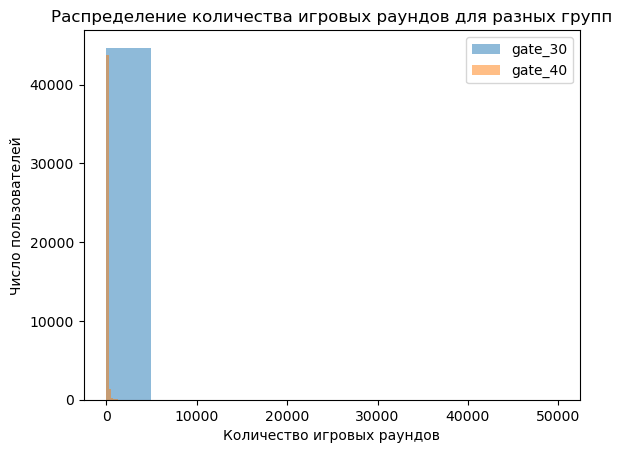

In [23]:
# Статистический анализ и визуализация:

# Сравним среднее количество игровых раундов между двумя группами
group_30 = df[df['version'] == 'gate_30']['sum_gamerounds']
group_40 = df[df['version'] == 'gate_40']['sum_gamerounds']

# Проведем t-тест для сравнения средних значений между двумя группами
t_stat, p_val = ttest_ind(group_30, group_40)
print(f"T-статистика: {t_stat}, P-значение: {p_val}")

# Chi-square тест для сравнения долей возвращения пользователей на 1-й и 7-й дни
chi2_stat_1, p_val_1, _, _ = chi2_contingency(pd.crosstab(df['version'], df['retention_1']))
chi2_stat_7, p_val_7, _, _ = chi2_contingency(pd.crosstab(df['version'], df['retention_7']))
print(f"P-значение для возврата на 1-й день: {p_val_1}")
print(f"P-значение для возврата на 7-й день: {p_val_7}")

# Визуализация распределения количества игровых раундов
plt.hist(group_30, alpha=0.5, label='gate_30')
plt.hist(group_40, alpha=0.5, label='gate_40')
plt.legend(loc='upper right')
plt.xlabel('Количество игровых раундов')
plt.ylabel('Число пользователей')
plt.title('Распределение количества игровых раундов для разных групп')
plt.show()

# Заключение и рекомендации

По результатам статистического анализа мы получили следующие данные:

- **T-тест для сравнения среднего количества игровых раундов:** 
    - T-статистика: 0.891
    - P-значение: 0.373
    
    С учетом значения P-значения, которое значительно выше стандартного порога в 0.05, мы не имеем оснований отвергать нулевую гипотезу о равенстве средних. Это означает, что статистически значимых различий в среднем количестве игровых раундов между группами `gate_30` и `gate_40` не обнаружено.

- **Chi-square тест для сравнения доли возврата на 1-й день:**
    - P-значение: 0.0755
    
    P-значение выше уровня значимости в 0.05, что указывает на отсутствие статистически значимых различий в доле возврата пользователей на 1-й день между двумя группами.

- **Chi-square тест для сравнения доли возврата на 7-й день:**
    - P-значение: 0.0016
    
    P-значение меньше 0.05, что свидетельствует о наличии статистически значимых различий в доле возврата пользователей на 7-й день. Группа `gate_30` показала лучшие результаты по удержанию пользователей на 7-й день по сравнению с группой `gate_40`.

### Рекомендации:

На основе проведенного анализа, можно предположить, что изменение размещения ворот с 30 на 40 уровень не привело к увеличению вовлеченности пользователей в краткосрочной перспективе (среднее количество игровых раундов и возврат на 1-й день не изменились). Однако, в долгосрочной перспективе (возврат на 7-й день) размещение ворот на 30 уровне оказалось эффективнее для удержания пользователей.

В свете этих выводов, рекомендуется **оставить ворота на 30 уровне**, так как это способствует более высокому показателю удержания игроков через неделю после начала игры.